## Mark EDA-2 for Housing Project

This is take 2, will load in data from 1st effort (before modeling) and continue forward with homes on the lower price range. 

### Import Libraries and Load Data

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the saved data set (csv)
plt.style.use('seaborn')
df = pd.read_csv('data/df3clean.csv')

In [3]:
# Review size and shape of the data (at this stage)
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(20452, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20452 entries, 0 to 20451
Data columns (total 39 columns):
Unnamed: 0       20452 non-null int64
price            20452 non-null float64
bedrooms         20452 non-null int64
bathrooms        20452 non-null float64
sqft_living      20452 non-null int64
sqft_lot         20452 non-null int64
floors           20452 non-null float64
waterfront       20452 non-null float64
view             20452 non-null float64
condition        20452 non-null int64
grade            20452 non-null int64
sqft_above       20452 non-null int64
sqft_basement    20452 non-null float64
yr_built         20452 non-null int64
yr_renovated     20452 non-null float64
zipcode          20452 non-null int64
sqft_living15    20452 non-null int64
sqft_lot15       20452 non-null int64
grade_4          20452 non-null int64
grade_5          20452 non-null int64
grade_6          20452 non-null int64
grade_7          20452 non-null int64
grade_8          20452 non-nu

None

'------------------------------------------------------------'

Unnamed: 0       False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
sqft_living15    False
sqft_lot15       False
grade_4          False
grade_5          False
grade_6          False
grade_7          False
grade_8          False
grade_9          False
grade_10         False
grade_11         False
grade_12         False
bath_0.75        False
bath_1.0         False
bath_1.25        False
bath_1.5         False
bath_1.75        False
bath_2.0         False
bath_2.25        False
bath_2.5         False
bath_2.75        False
bath_3.0         False
bath_3.25        False
bath_3.5         False
dtype: bool

Unnamed: 0       0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
grade_4          0
grade_5          0
grade_6          0
grade_7          0
grade_8          0
grade_9          0
grade_10         0
grade_11         0
grade_12         0
bath_0.75        0
bath_1.0         0
bath_1.25        0
bath_1.5         0
bath_1.75        0
bath_2.0         0
bath_2.25        0
bath_2.5         0
bath_2.75        0
bath_3.0         0
bath_3.25        0
bath_3.5         0
dtype: int64

'------------------------------------------------------------'

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,1,0,0,0,0,0
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,1,0,0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# first drop an unnecessary column (Unnamed: 0)
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Questions / Ideas: 
# should we create dummies for bedrooms, condition? YES
# consider cutting outliers for yr_built (cut below 1940) YES
# Consider cutting down price a bit more (start at 154K? - 2SD below mean or at 200K - close to the 25 percentile) YES
# consider banding / bining for yr_built? (in increments of 15 years?)
# should we only include dummies that have reasonable occurance in the data (>10%)
# most independent variables above are categorical...small scaled... only large scales are price and sqft measures.
# ahould we consider some transformations for price? sqft? 


In [15]:
# Create dummies for condition
condition_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
df1 = pd.concat([df, condition_dummies], axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [16]:
# Create dummies for bedrooms
bedrooms_dummies = pd.get_dummies(df1['bedrooms'], prefix='bed', drop_first=True)
df2 = pd.concat([df1, bedrooms_dummies], axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [18]:
# Create the low priced df... use < 315K and also > 154K
df2_low = df2.loc[(df2['price'] >= 154000) & (df2['price'] <= 315000)]
df2_low.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
df2_low.shape

(4934, 52)

In [20]:
# Cut years outliers on low end (only include if >1940)
df3_low = df2_low.loc[df2_low['yr_built'] > 1940]
df3_low.shape

(4379, 52)

In [22]:
# Look at descriptives for new df with +- 2 SD bands added
df3_low.describe()
desc_df = df3_low.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
count,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.0,4379.0,4379.0,4379.000000,4379.000000,4379.0,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.0,4379.0,4379.0,4379.0
mean,254876.091573,3.100251,1.727449,1506.313999,9689.443709,1.284654,0.000228,0.032427,3.412423,6.914821,1348.428408,155.565426,1973.355561,25.065997,98071.808632,1577.761818,9523.922128,0.001370,0.016670,0.189541,0.656314,0.130395,0.005709,0.0,0.0,0.0,0.005481,0.305092,0.0,0.113268,0.168532,0.112126,0.089061,0.171957,0.018041,0.013017,0.001599,0.001370,0.013930,0.618178,0.306691,0.060516,0.154602,0.599680,0.202558,0.028774,0.003882,0.000685,0.0,0.0,0.0,0.0
std,39819.607680,0.739938,0.597187,447.856694,13555.403862,0.462610,0.015112,0.265839,0.628827,0.643914,400.816978,295.447668,19.645577,222.284338,61.203014,379.295980,14090.845644,0.036995,0.128048,0.391983,0.474992,0.336776,0.075351,0.0,0.0,0.0,0.073837,0.460499,0.0,0.316956,0.374380,0.315558,0.284865,0.377386,0.133114,0.113359,0.039954,0.036995,0.117214,0.485889,0.461173,0.238468,0.361566,0.490019,0.401951,0.167189,0.062193,0.026168,0.0,0.0,0.0,0.0
min,154000.000000,1.000000,0.500000,380.000000,572.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1941.000000,0.000000,98001.000000,620.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,226000.000000,3.000000,1.000000,1180.000000,6229.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1060.000000,0.000000,1958.000000,0.000000,98023.000000,1300.000000,6437.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,260000.000000,3.000000,1.750000,1470.000000,7904.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1280.000000,0.000000,1970.000000,0.000000,98042.000000,1540.000000,7915.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,288000.000000,3.000000,2.250000,1800.000000,9690.500000,2.000000,0.000000,0.000000,4.000000,7.000000,1587.000000,200.000000,1989.000000,0.000000,98125.000000,1810.000000,9484.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,315000.000000,7.000000,3.500000,3340.000000,306848.000000,3.000000,1.000000,3.000000,5.000000,9.000000,3340.000000,1570.000000,2015.000000,2014.000000,98198.000000,3557.000000,392040.000000,1.000000,1.000000,1

In [23]:
# drop the columns we created dummies from
df4_low = df3_low.drop(['bathrooms','bedrooms','grade','condition'],axis=1)
print (df4_low.shape)
df4_low.head()

(4379, 48)


,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
18,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


(array([0.01990458, 0.00796183, 0.01555335, 0.01138727, 0.0166643 ,
        0.01638656, 0.01842331, 0.01897879, 0.02601483, 0.00823957,
        0.03342118, 0.01360918, 0.00916537, 0.00814699, 0.01388692,
        0.02499645, 0.00759151, 0.01509045, 0.01203533, 0.01814557,
        0.00907279, 0.01583109, 0.00527703, 0.00777667, 0.00546219,
        0.01703462, 0.00935052, 0.01009116, 0.00490671, 0.00499929]),
 array([1941.        , 1943.46666667, 1945.93333333, 1948.4       ,
        1950.86666667, 1953.33333333, 1955.8       , 1958.26666667,
        1960.73333333, 1963.2       , 1965.66666667, 1968.13333333,
        1970.6       , 1973.06666667, 1975.53333333, 1978.        ,
        1980.46666667, 1982.93333333, 1985.4       , 1987.86666667,
        1990.33333333, 1992.8       , 1995.26666667, 1997.73333333,
        2000.2       , 2002.66666667, 2005.13333333, 2007.6       ,
        2010.06666667, 2012.53333333, 2015.        ]),
 <a list of 1 Patch objects>)

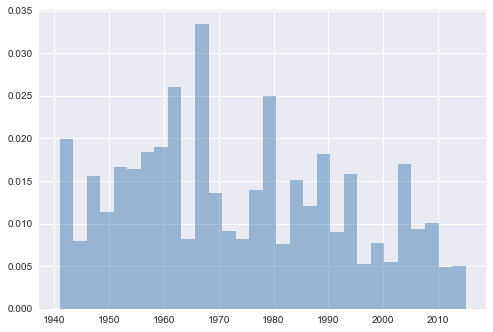

In [27]:
# Examine yr_built data via histogram...
plt.hist(df4_low.yr_built, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

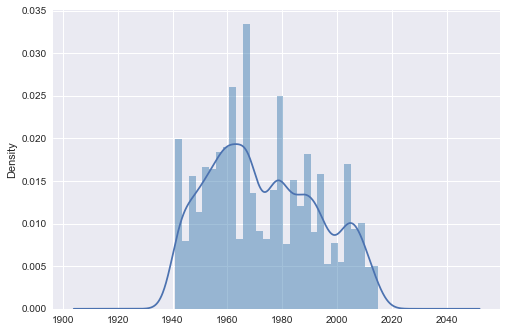

In [26]:
# Examine yr_built data via histogram...
plt.hist(df4_low.yr_built, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
df4_low['yr_built'].plot.kde(label ='kde')

In [ ]:
# Create bands for yr_built...



In [28]:
# Chek for duplicates
duplicate_rows_df = df4_low[df4_low.duplicated()]
print(duplicate_rows_df.shape)
duplicate_rows_df

(1, 48)


,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
4123,259950.0,1070,649,2.0,0.0,0.0,720,350.0,2008,0.0,98106,1070,928,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Display rows it is duplicate with and if in fact a duplicate ... Drop that duplicate row



In [29]:
# Need to fix the column labels for the bath dummies (get rid of the decimal points)
# df = df.rename(columns={‘bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', 'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', 'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', 'bath_3.0':'bath_3_0','bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})
df = df.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', 'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', 'bath_2.25':'bath_2_25',\
'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', 'bath_3.0':'bath_3_0','bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [33]:
# Export the data file for team use in modeling
df4_low.to_csv(r'data/df5_low.csv')

In [45]:
df5 = pd.read_csv('data/df5_low.csv', index=False)

TypeError: parser_f() got an unexpected keyword argument 'index'

In [46]:
df5 = df5.drop(['Unnamed: 0'], axis=1)

In [47]:
df5.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [48]:
train, test = train_test_split(df5, test_size=0.25, random_state=42)

In [49]:
train.shape

(3284, 48)

In [50]:
test.shape

(1095, 48)

In [64]:
# Need to fix the column labels for the bath dummies (get rid of the decimal points)
train = train.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', 'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', 'bath_2.25':'bath_2_25',\
'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', 'bath_3.0':'bath_3_0','bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [65]:
train.describe()

,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.0,3284.0,3284.0,3284.000000,3284.000000,3284.0,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.0,3284.0,3284.0,3284.0
mean,255180.794458,1511.614495,9731.079781,1.286084,0.000305,0.033800,1353.948538,155.500914,1973.411998,28.559988,98072.257004,1579.523447,9419.327345,0.000914,0.018575,0.181486,0.660171,0.133374,0.005481,0.0,0.0,0.0,0.003959,0.305420,0.0,0.111754,0.169610,0.109927,0.090134,0.174482,0.017966,0.013094,0.001827,0.001827,0.013703,0.623021,0.302375,0.060597,0.147077,0.608100,0.203410,0.027710,0.004263,0.000914,0.0,0.0,0.0,0.0
std,39959.522564,447.364593,14239.754382,0.461584,0.017450,0.269953,400.938225,297.098819,19.618254,237.060505,61.696202,375.474177,13108.345420,0.030215,0.135039,0.385479,0.473723,0.340030,0.073843,0.0,0.0,0.0,0.062802,0.460655,0.0,0.315111,0.375347,0.312846,0.286417,0.379582,0.132848,0.113694,0.042711,0.042711,0.116272,0.484703,0.459357,0.238626,0.354236,0.488249,0.402597,0.164166,0.065163,0.030215,0.0,0.0,0.0,0.0
min,154000.000000,380.000000,572.000000,1.000000,0.000000,0.000000,380.000000,0.000000,1941.000000,0.000000,98001.000000,620.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,226787.500000,1180.000000,6212.000000,1.000000,0.000000,0.000000,1060.000000,0.000000,1958.000000,0.000000,98023.000000,1310.000000,6403.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,260000.000000,1480.000000,7875.000000,1.000000,0.000000,0.000000,1280.000000,0.000000,1969.000000,0.000000,98042.000000,1540.000000,7904.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,289000.000000,1800.000000,9656.000000,2.000000,0.000000,0.000000,1600.000000,177.000000,1989.000000,0.000000,98125.000000,1806.250000,9497.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,315000.000000,3340.000000,306848.000000,3.000000,1.000000,3.000000,3340.000000,1570.000000,2015.000000,2014.000000,98198.000000,3557.000000,217800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [51]:
df5.describe()

,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
count,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.0,4379.0,4379.0,4379.000000,4379.000000,4379.0,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.0,4379.0,4379.0,4379.0
mean,254876.091573,1506.313999,9689.443709,1.284654,0.000228,0.032427,1348.428408,155.565426,1973.355561,25.065997,98071.808632,1577.761818,9523.922128,0.001370,0.016670,0.189541,0.656314,0.130395,0.005709,0.0,0.0,0.0,0.005481,0.305092,0.0,0.113268,0.168532,0.112126,0.089061,0.171957,0.018041,0.013017,0.001599,0.001370,0.013930,0.618178,0.306691,0.060516,0.154602,0.599680,0.202558,0.028774,0.003882,0.000685,0.0,0.0,0.0,0.0
std,39819.607680,447.856694,13555.403862,0.462610,0.015112,0.265839,400.816978,295.447668,19.645577,222.284338,61.203014,379.295980,14090.845644,0.036995,0.128048,0.391983,0.474992,0.336776,0.075351,0.0,0.0,0.0,0.073837,0.460499,0.0,0.316956,0.374380,0.315558,0.284865,0.377386,0.133114,0.113359,0.039954,0.036995,0.117214,0.485889,0.461173,0.238468,0.361566,0.490019,0.401951,0.167189,0.062193,0.026168,0.0,0.0,0.0,0.0
min,154000.000000,380.000000,572.000000,1.000000,0.000000,0.000000,380.000000,0.000000,1941.000000,0.000000,98001.000000,620.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,226000.000000,1180.000000,6229.500000,1.000000,0.000000,0.000000,1060.000000,0.000000,1958.000000,0.000000,98023.000000,1300.000000,6437.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,260000.000000,1470.000000,7904.000000,1.000000,0.000000,0.000000,1280.000000,0.000000,1970.000000,0.000000,98042.000000,1540.000000,7915.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,288000.000000,1800.000000,9690.500000,2.000000,0.000000,0.000000,1587.000000,200.000000,1989.000000,0.000000,98125.000000,1810.000000,9484.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,315000.000000,3340.000000,306848.000000,3.000000,1.000000,3.000000,3340.000000,1570.000000,2015.000000,2014.000000,98198.000000,3557.000000,392040.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [53]:
# TRY first model with new data frame -UGH forgot about train test ssplit and ran on entire dataframe. 
from statsmodels.formula.api import ols
f = 'price~grade_6+grade_7+grade_8+sqft_living+bed_2+bed_3+bed_4'
# create a fitted model in one line
model = ols(formula=f, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     118.5
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          7.60e-160
Time:                        14:54:04   Log-Likelihood:                -52215.
No. Observations:                4379   AIC:                         1.044e+05
Df Residuals:                    4371   BIC:                         1.045e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.985e+05   5057.699     39.252      0.000    1.89e+05    2.08e+05
grade_6     -2953.3288   3821.453     -0.773      0.440   -1.04e+04    4538.656
grade_7      8941.1330   3700.552      2.416      0.016    1686.175    1.62e+04
grade_8      1.755e+04   4021.166      4.363      0.000    9662.061    2.54e+04
sqft_living    29.6730      1.650     17.985      0.000      26.438      32.908
bed_2        1.188e+04   3252.390      3.654      0.000    5507.917    1.83e+04
bed_3        2743.9058   2837.322      0.967      0.334   -2818.684    8306.496
bed_4        2828.0827   2938.168      0.963      0.336   -2932.215    8588.380
==============================================================================
Omnibus:                       83.857   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.592
Skew:                          -0.266   Prob(JB):                     6.35e-17
Kurtosis:                       2.646   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# TRY 2 model with new data frame

f = 'price~grade_7+grade_8+sqft_living+yr_built'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          7.72e-121
Time:                        15:42:40   Log-Likelihood:                -39173.
No. Observations:                3284   AIC:                         7.836e+04
Df Residuals:                    3279   BIC:                         7.839e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.539e+05   7.33e+04     -3.461      0.001   -3.98e+05    -1.1e+05
grade_7      4303.3483   1858.463      2.316      0.021     659.482    7947.214
grade_8       1.02e+04   2741.407      3.721      0.000    4825.890    1.56e+04
sqft_living    26.5941      1.647     16.144      0.000      23.364      29.824
yr_built      235.4491     37.600      6.262      0.000     161.727     309.171
==============================================================================
Omnibus:                       51.225   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.081
Skew:                          -0.232   Prob(JB):                     1.62e-10
Kurtosis:                       2.662   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


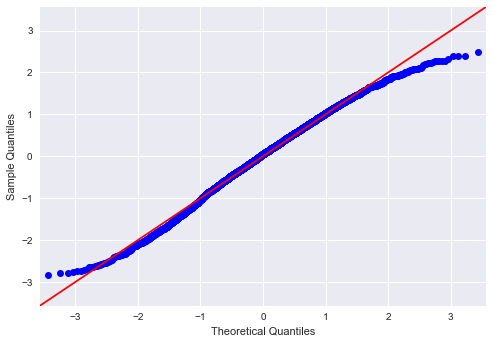

In [55]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

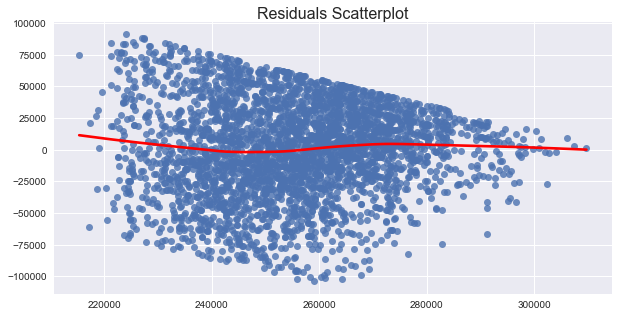

In [62]:
# Alternative for residual plot - whole model version?
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

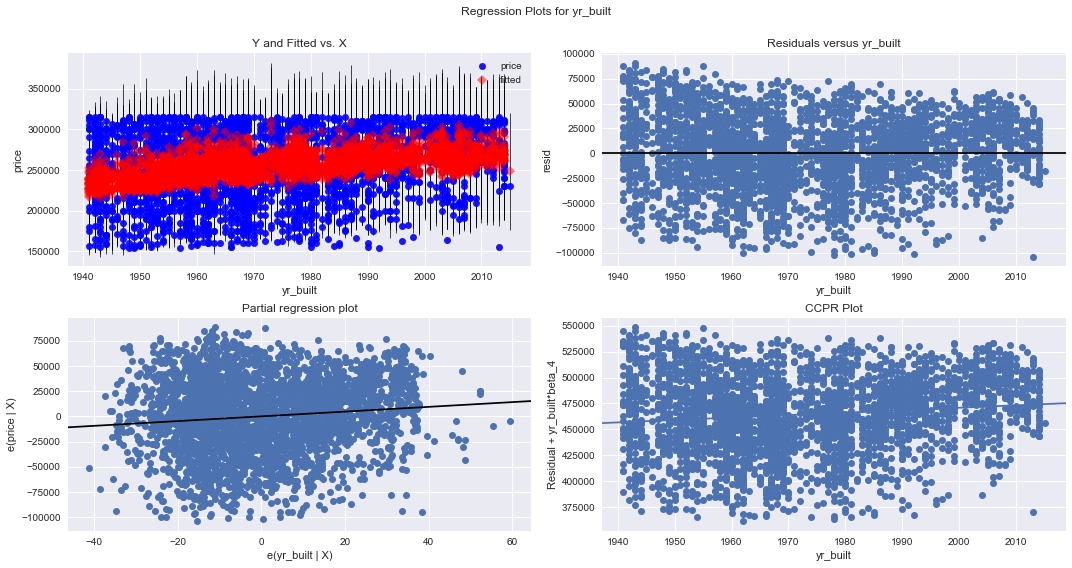

In [57]:
# Residual Plot - single linear
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

In [58]:
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [59]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 35298.864252979176
Test Root Mean Squarred Error: 34734.24953185287


In [ ]:
# Plot the Model - single linear

# create a DataFrame with the minimum and maximum values of TV
# X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
# print(X_new.head())

# make predictions for those x values and store them
# preds = model.predict(X_new) #predicts the start/end of line
# print (preds)

# first, plot the observed data and the least squares line
# data.plot(kind='scatter', x='TV', y='Sales')
# plt.plot(X_new, preds, c='red', linewidth=2)
# plt.show()

In [66]:
train.describe()

,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.0,3284.0,3284.0,3284.000000,3284.000000,3284.0,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.0,3284.0,3284.0,3284.0
mean,255180.794458,1511.614495,9731.079781,1.286084,0.000305,0.033800,1353.948538,155.500914,1973.411998,28.559988,98072.257004,1579.523447,9419.327345,0.000914,0.018575,0.181486,0.660171,0.133374,0.005481,0.0,0.0,0.0,0.003959,0.305420,0.0,0.111754,0.169610,0.109927,0.090134,0.174482,0.017966,0.013094,0.001827,0.001827,0.013703,0.623021,0.302375,0.060597,0.147077,0.608100,0.203410,0.027710,0.004263,0.000914,0.0,0.0,0.0,0.0
std,39959.522564,447.364593,14239.754382,0.461584,0.017450,0.269953,400.938225,297.098819,19.618254,237.060505,61.696202,375.474177,13108.345420,0.030215,0.135039,0.385479,0.473723,0.340030,0.073843,0.0,0.0,0.0,0.062802,0.460655,0.0,0.315111,0.375347,0.312846,0.286417,0.379582,0.132848,0.113694,0.042711,0.042711,0.116272,0.484703,0.459357,0.238626,0.354236,0.488249,0.402597,0.164166,0.065163,0.030215,0.0,0.0,0.0,0.0
min,154000.000000,380.000000,572.000000,1.000000,0.000000,0.000000,380.000000,0.000000,1941.000000,0.000000,98001.000000,620.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,226787.500000,1180.000000,6212.000000,1.000000,0.000000,0.000000,1060.000000,0.000000,1958.000000,0.000000,98023.000000,1310.000000,6403.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,260000.000000,1480.000000,7875.000000,1.000000,0.000000,0.000000,1280.000000,0.000000,1969.000000,0.000000,98042.000000,1540.000000,7904.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,289000.000000,1800.000000,9656.000000,2.000000,0.000000,0.000000,1600.000000,177.000000,1989.000000,0.000000,98125.000000,1806.250000,9497.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,315000.000000,3340.000000,306848.000000,3.000000,1.000000,3.000000,3340.000000,1570.000000,2015.000000,2014.000000,98198.000000,3557.000000,217800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [67]:
# TRY Model #3 - all in version
f = 'price~bed_3+bath_1_0+grade_6+grade_7+grade_8+cond_3+cond_4+sqft_living+sqft_living15+sqft_lot+yr_built+yr_renovated'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     55.67
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          1.43e-122
Time:                        21:35:07   Log-Likelihood:                -39150.
No. Observations:                3284   AIC:                         7.833e+04
Df Residuals:                    3271   BIC:                         7.841e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e+05   8.49e+04     -2.195      0.028   -3.53e+05   -1.99e+04
bed_3         -2688.9236   1351.038     -1.990      0.047   -5337.890     -39.957
bath_1_0      -3088.4191   1878.009     -1.645      0.100   -6770.613     593.774
grade_6        3416.2421   4353.279      0.785      0.433   -5119.187     1.2e+04
grade_7        6732.7184   4238.001      1.589      0.112   -1576.685     1.5e+04
grade_8        1.046e+04   4667.292      2.242      0.025    1311.612    1.96e+04
cond_3          566.1397   2575.339      0.220      0.826   -4483.300    5615.579
cond_4        -1838.4146   2637.639     -0.697      0.486   -7010.005    3333.176
sqft_living      20.2781      2.041      9.937      0.000      16.277      24.279
sqft_living15    10.8957      2.260      4.820      0.000       6.464      15.328
sqft_lot          0.0582      0.046      1.260      0.208      -0.032       0.149
yr_built        197.2030     43.211      4.564      0.000     112.479     281.927
yr_renovated      7.2870      2.719      2.680      0.007       1.955      12.619
==============================================================================
Omnibus:                       47.984   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.148
Skew:                          -0.240   Prob(JB):                     2.59e-10
Kurtosis:                       2.698   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# TRY Model #4 - remove 1/3 worst performing
f = 'price~bed_3+bed_4+grade_8+grade_7+sqft_living+sqft_living15+yr_built+yr_renovated'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     83.20
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          9.66e-126
Time:                        21:46:45   Log-Likelihood:                -39152.
No. Observations:                3284   AIC:                         7.832e+04
Df Residuals:                    3275   BIC:                         7.838e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.496e+05   7.38e+04     -3.384      0.001   -3.94e+05   -1.05e+05
bed_3         -4971.2589   1746.172     -2.847      0.004   -8394.958   -1547.560
bed_4         -4688.6382   2265.270     -2.070      0.039   -9130.127    -247.149
grade_8        7718.0036   2782.503      2.774      0.006    2262.382    1.32e+04
grade_7        4208.7599   1876.790      2.243      0.025     528.960    7888.560
sqft_living      22.7294      2.019     11.259      0.000      18.771      26.688
sqft_living15    11.4006      2.231      5.109      0.000       7.026      15.776
yr_built        229.2099     37.926      6.044      0.000     154.848     303.571
yr_renovated      7.9107      2.707      2.923      0.003       2.604      13.218
==============================================================================
Omnibus:                       51.544   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.859
Skew:                          -0.245   Prob(JB):                     6.68e-11
Kurtosis:                       2.682   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


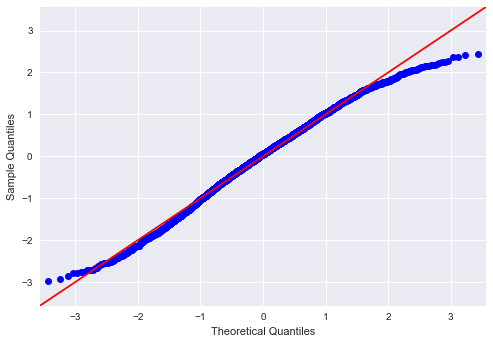

In [69]:
# QQ Plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [71]:
# Check for normality of residuals by checking the mean of residuals...
mean_residuals = sum(residuals) / len(residuals)
print("The mean of the residuals {:.4}".format(mean_residuals))

The mean of the residuals -2.834e-09


Text(0.5, 0.99, 'Residuals Scatterplot')

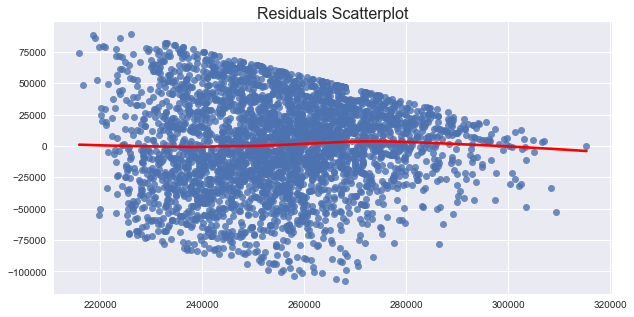

In [72]:
# Alternative for residual plot - whole model version?
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

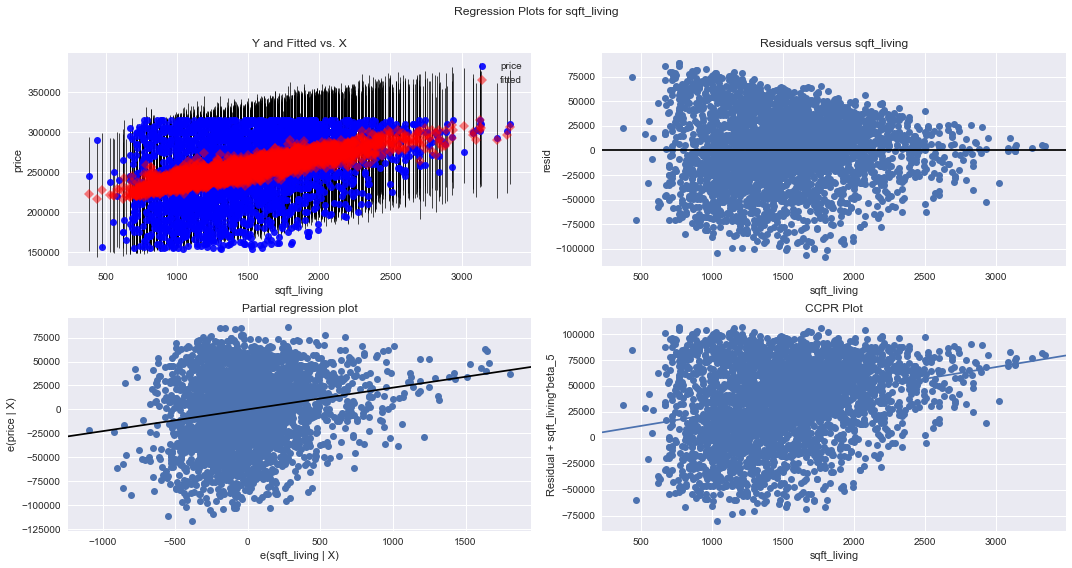

In [73]:
# Residual Plot - single linear
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [75]:
# TRY Model #5 - lots of dummies plus best t-score
f = 'price~grade_5+grade_6+grade_7+grade_8+grade_9+cond_2+cond_3+cond_4+cond_5+floors+view+sqft_living+yr_built'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.14
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          7.13e-135
Time:                        22:29:12   Log-Likelihood:                -39119.
No. Observations:                3284   AIC:                         7.827e+04
Df Residuals:                    3270   BIC:                         7.835e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.336e+05      1e+05      1.335      0.182   -6.26e+04     3.3e+05
grade_5      3.602e+04   2.14e+04      1.682      0.093   -5957.426     7.8e+04
grade_6      4.093e+04   2.09e+04      1.954      0.051    -136.905     8.2e+04
grade_7      4.763e+04    2.1e+04      2.271      0.023    6515.717    8.87e+04
grade_8       5.27e+04   2.11e+04      2.498      0.013    1.13e+04    9.41e+04
grade_9      5.217e+04   2.27e+04      2.295      0.022    7606.629    9.67e+04
cond_2       1.181e+04   3.68e+04      0.321      0.748   -6.04e+04     8.4e+04
cond_3       3.217e+04   3.65e+04      0.882      0.378   -3.93e+04    1.04e+05
cond_4        3.11e+04   3.65e+04      0.853      0.394   -4.04e+04    1.03e+05
cond_5       3.707e+04   3.65e+04      1.015      0.310   -3.45e+04    1.09e+05
floors       1.514e+04   1822.142      8.308      0.000    1.16e+04    1.87e+04
view         8043.2621   2365.440      3.400      0.001    3405.369    1.27e+04
sqft_living    24.7323      1.652     14.967      0.000      21.492      27.972
yr_built       -7.1999     47.321     -0.152      0.879     -99.981      85.582
==============================================================================
Omnibus:                       44.647   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.559
Skew:                          -0.235   Prob(JB):                     9.45e-10
Kurtosis:                       2.714   Cond. No.                     4.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# TRY Model #6 - lots of dummies plus best t-score
f = 'price~bed_2+bed_3+bed_4+grade_7+grade_8+grade_9+floors+view+sqft_living'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     80.41
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          4.15e-135
Time:                        22:34:15   Log-Likelihood:                -39127.
No. Observations:                3284   AIC:                         7.827e+04
Df Residuals:                    3274   BIC:                         7.834e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.839e+05   4706.928     39.066      0.000    1.75e+05    1.93e+05
bed_2        8316.6302   3822.096      2.176      0.030     822.689    1.58e+04
bed_3        3909.9424   3311.246      1.181      0.238   -2582.382    1.04e+04
bed_4        1658.2121   3416.365      0.485      0.627   -5040.218    8356.642
grade_7      7348.5503   1798.958      4.085      0.000    3821.354    1.09e+04
grade_8      1.181e+04   2627.384      4.496      0.000    6660.556     1.7e+04
grade_9       1.07e+04   8852.446      1.209      0.227   -6657.767    2.81e+04
floors       1.492e+04   1464.571     10.187      0.000     1.2e+04    1.78e+04
view         7695.4605   2367.762      3.250      0.001    3053.016    1.23e+04
sqft_living    27.4079      1.933     14.181      0.000      23.618      31.197
==============================================================================
Omnibus:                       46.959   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.459
Skew:                          -0.249   Prob(JB):                     2.22e-10
Kurtosis:                       2.723   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# TRY Model #7 - lots of dummies plus best t-score
f = 'price~bed_2+bath_1_0+bath_1_5+bath_1_75+bath_2_0+bath_2_25+bath_2_5+grade_7+grade_8+floors+view+sqft_living'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     61.44
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          8.90e-135
Time:                        22:39:33   Log-Likelihood:                -39122.
No. Observations:                3284   AIC:                         7.827e+04
Df Residuals:                    3271   BIC:                         7.835e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.969e+05   5775.950     34.093      0.000    1.86e+05    2.08e+05
bed_2        5422.7210   2011.258      2.696      0.007    1479.270    9366.172
bath_1_0    -3612.3796   3839.179     -0.941      0.347   -1.11e+04    3915.058
bath_1_5    -2859.0754   3906.056     -0.732      0.464   -1.05e+04    4799.487
bath_1_75    2096.4327   3708.163      0.565      0.572   -5174.124    9366.990
bath_2_0    -1521.1584   3855.057     -0.395      0.693   -9079.727    6037.410
bath_2_25    4623.9398   3860.681      1.198      0.231   -2945.656    1.22e+04
bath_2_5     4810.5573   3614.189      1.331      0.183   -2275.745    1.19e+04
grade_7      6149.0528   1822.171      3.375      0.001    2576.341    9721.765
grade_8      9714.3862   2637.675      3.683      0.000    4542.724    1.49e+04
floors       1.259e+04   1773.255      7.101      0.000    9115.279    1.61e+04
view         7969.6146   2351.392      3.389      0.001    3359.265    1.26e+04
sqft_living    23.5659      1.987     11.860      0.000      19.670      27.462
==============================================================================
Omnibus:                       44.474   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.610
Skew:                          -0.247   Prob(JB):                     5.59e-10
Kurtosis:                       2.740   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# TRY Model #8 - lots of dummies plus best t-score
f = 'price~yr_built+bed_2++grade_7+grade_8+floors+view+sqft_living+sqft_living15'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     94.57
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          7.64e-142
Time:                        22:43:04   Log-Likelihood:                -39114.
No. Observations:                3284   AIC:                         7.825e+04
Df Residuals:                    3275   BIC:                         7.830e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.062e+05   9.03e+04      2.284      0.022    2.92e+04    3.83e+05
yr_built        -14.5067     46.835     -0.310      0.757    -106.336      77.323
bed_2          5163.8813   2000.323      2.582      0.010    1241.870    9085.892
grade_7        6205.6101   1863.432      3.330      0.001    2552.001    9859.220
grade_8        8348.2073   2749.809      3.036      0.002    2956.689    1.37e+04
floors         1.517e+04   1820.548      8.331      0.000    1.16e+04    1.87e+04
view           7006.5229   2351.516      2.980      0.003    2395.932    1.16e+04
sqft_living      21.5225      1.955     11.007      0.000      17.689      25.356
sqft_living15    12.2775      2.215      5.543      0.000       7.935      16.620
==============================================================================
Omnibus:                       45.779   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.121
Skew:                          -0.253   Prob(JB):                     2.63e-10
Kurtosis:                       2.743   Cond. No.                     4.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [99]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: shapes (1095,47) and (48,1) not aligned: 47 (dim 1) != 48 (dim 0)

In [95]:

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 35298.864252979176
Test Root Mean Squarred Error: 34734.24953185287


In [ ]:
# The Measurement of error (train versus test)
# NOTE: originally did the simple train/test split and used StatsModel for iterative modeling
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

In [ ]:
# Time to think about new ideas.... 

In [ ]:
# Hhmmmm... 

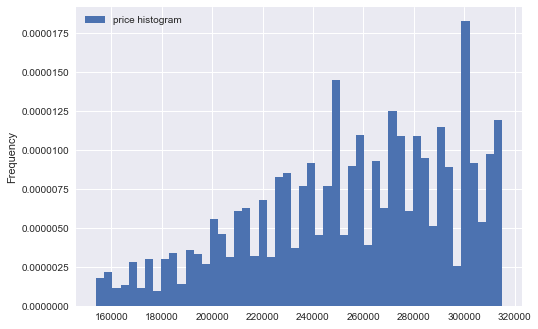

In [87]:
train.price.plot.hist(density=True, bins=50, label = 'price histogram')
plt.legend()
plt.show()

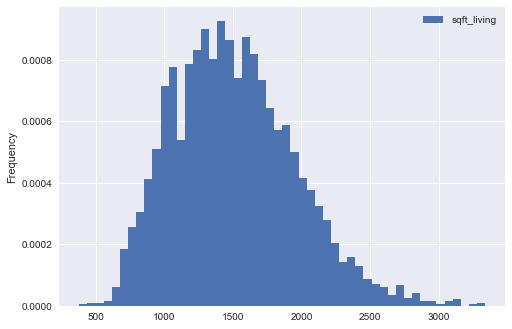

In [88]:
train.sqft_living.plot.hist(density=True, bins=50, label = 'sqft_living')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Log of price')

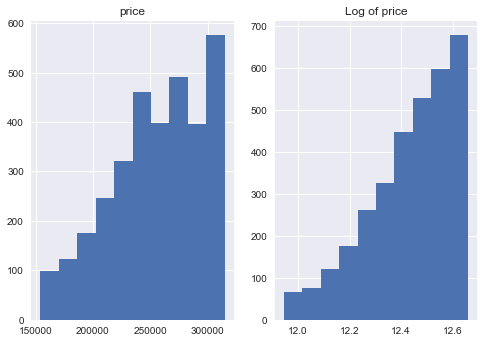

In [80]:
# Another Log approach
import numpy as np
f, ax = plt.subplots(1, 2)
ax[0].hist(train.price)
ax[0].set_title("price")
ax[1].hist(np.log(train.price))
ax[1].set_title("Log of price")

In [82]:
train['log_price'] = np.log(train.price)

In [83]:
train.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,log_price
3917,299000.0,1730,6007,1.0,0.0,0.0,1730,0.0,2004,0.0,98030,2000,6245,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12.608199
2320,235000.0,1200,9266,1.0,0.0,0.0,1200,0.0,1960,0.0,98002,1200,9266,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,12.367341
3033,310000.0,1010,10005,2.0,0.0,0.0,1010,0.0,1981,0.0,98056,1210,7794,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,12.644328
2656,263000.0,1300,7885,1.0,0.0,0.0,1300,0.0,1968,0.0,98055,1840,7600,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12.479909
1457,217000.0,1110,9827,1.0,0.0,0.0,1110,0.0,1966,0.0,98198,1540,10187,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12.287653


In [89]:
# Try a model with log price... 
# TRY Model #9 - same as 8 BUT log_price as dep. var
f = 'log_price~bed_2++grade_7+grade_8+floors+view+sqft_living+sqft_living15'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     105.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          1.12e-139
Time:                        08:31:40   Log-Likelihood:                 1554.7
No. Observations:                3284   AIC:                            -3093.
Df Residuals:                    3276   BIC:                            -3045.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1195      0.014    837.605      0.000      12.091      12.148
bed_2             0.0193      0.008      2.312      0.021       0.003       0.036
grade_7           0.0279      0.007      3.785      0.000       0.013       0.042
grade_8           0.0349      0.011      3.160      0.002       0.013       0.057
floors            0.0599      0.006      9.865      0.000       0.048       0.072
view              0.0283      0.010      2.875      0.004       0.009       0.048
sqft_living    8.951e-05   8.17e-06     10.950      0.000    7.35e-05       0.000
sqft_living15  4.926e-05   9.19e-06      5.363      0.000    3.13e-05    6.73e-05
==============================================================================
Omnibus:                      161.381   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.626
Skew:                          -0.569   Prob(JB):                     8.11e-41
Kurtosis:                       3.236   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# Observations on model#9...
# Still very low R2 value... log of price did not seem to help at all
# All 7 included indp. variables are significant: sqft_living continues to have highest t-score
# Durban-Watson is in bounds for homoscedasticity?; Omnibus seems off so not normal residuals... QQplot shows left skew


/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


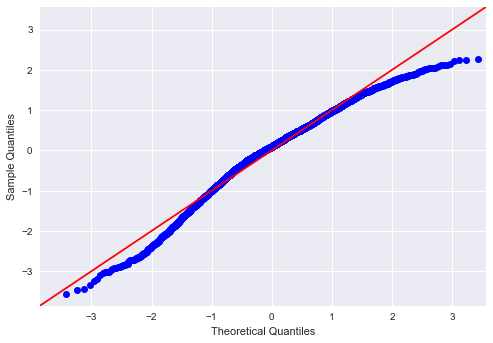

In [90]:
# QQ Plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

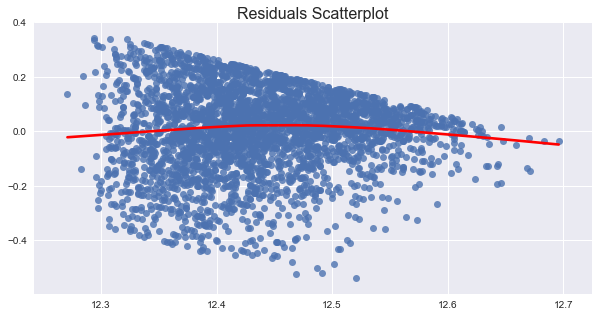

In [91]:
# Alternative for residual plot - whole model version?
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [96]:
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['log_price']]
X_train = train.drop(['log_price'],axis=1)

In [97]:
# Try testing for RMSE again

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


ValueError: shapes (1095,47) and (48,1) not aligned: 47 (dim 1) != 48 (dim 0)

In [ ]:
# Code for a log of price to unlog it? 
train_mse = mean_squared_error(np.ex(y_train), np.ex(y_hat_train))
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)
